In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import hvplot.pandas
from pathlib import Path

In [2]:
# Assign data files
events = "athlete_events.csv"
region = "noc_regions.csv"
# Read the data
events_data = pd.read_csv(events)
region_data = pd.read_csv(region)
#events_data.head()
#region_data.head()
#Combine the data into a single DataFrame
Olympics_df = pd.merge(events_data,region_data, how ="left", on ='NOC')
Olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [3]:
olympics_fdf = Olympics_df[['ID', 'Name', 'Sex', 'Age','Height','Weight','Team','Games','Year','Season','City','Sport','Medal','region']]
olympics_fdf

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,NaN,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,NaN,Poland


In [4]:
olympics_region=olympics_fdf.loc[olympics_fdf["Medal"]=="Gold"]
olympics_region=olympics_region.loc[olympics_fdf["Medal"]!="NaN"]
olympics_region2=olympics_region.groupby("region")
olympics_region2.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Gold,Norway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246669,123513,Mara Isabel Urrutia Ocor,F,35.0,170.0,78.0,Colombia,2000 Summer,2000,Summer,Sydney,Weightlifting,Gold,Colombia
250501,125468,Edwin Gonzalo Vsquez Cam,M,25.0,NaN,NaN,Peru,1948 Summer,1948,Summer,London,Shooting,Gold,Peru
252586,126491,Igors Vihrovs,M,22.0,165.0,62.0,Latvia,2000 Summer,2000,Summer,Sydney,Gymnastics,Gold,Latvia
259005,129665,"Hannelore ""Hanni"" Wenzel (-Weirather)",F,23.0,165.0,57.0,Liechtenstein,1980 Winter,1980,Winter,Lake Placid,Alpine Skiing,Gold,Liechtenstein


In [5]:
olympics_age=olympics_fdf[olympics_fdf["Age"] !='N/A']
olympics_age.head()


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,NaN,Netherlands


In [6]:
olympics_fdf_cleaned = olympics_fdf.dropna(subset=['Age'])

In [7]:
# Aleksey - Start: Fill missing Age values with the mean age using .loc
mean_age = olympics_fdf['Age'].mean()
olympics_fdf.loc[olympics_fdf['Age'].isna(), 'Age'] = mean_age

# Continue with the rest of the code for creating pie charts using olympics_fdf

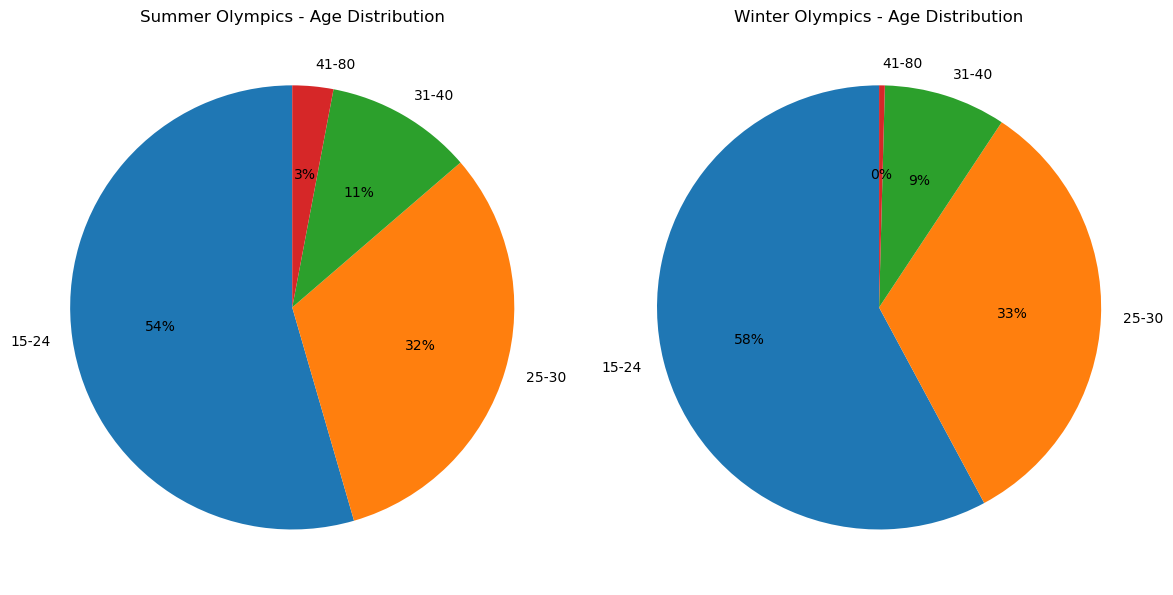

In [8]:
# Filter the data for summer and winter seasons
summer_data = olympics_fdf[olympics_fdf['Season'] == 'Summer'].copy()
winter_data = olympics_fdf[olympics_fdf['Season'] == 'Winter'].copy()

# Create age bins
age_bins = [15, 25, 31, 41, 80]  
age_labels = ['15-24', '25-30', '31-40', '41-80',]

# Apply the age bins  
summer_data.loc[:, 'Age Group'] = pd.cut(summer_data['Age'], bins=age_bins, labels=age_labels)
winter_data.loc[:, 'Age Group'] = pd.cut(winter_data['Age'], bins=age_bins, labels=age_labels)

summer_age_counts = summer_data['Age Group'].value_counts()
winter_age_counts = winter_data['Age Group'].value_counts()

# Plot pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.pie(summer_age_counts, labels=summer_age_counts.index, autopct='%1.0f%%', startangle=90)
ax1.set_title('Summer Olympics - Age Distribution')

ax2.pie(winter_age_counts, labels=winter_age_counts.index, autopct='%1.0f%%', startangle=90)
ax2.set_title('Winter Olympics - Age Distribution')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

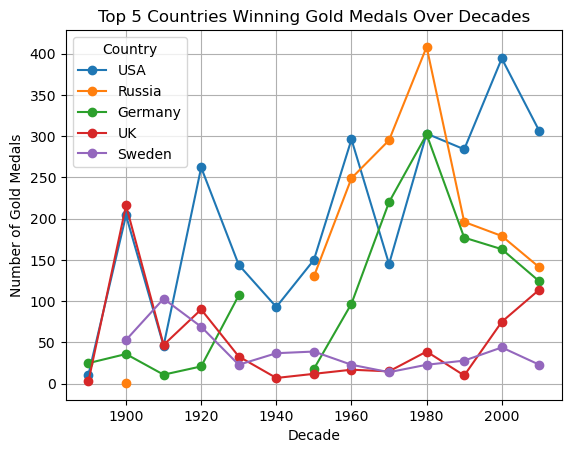

FileNotFoundError: [Errno 2] No such file or directory: 'data/top_countries_data.png'

<Figure size 640x480 with 0 Axes>

In [10]:
# Filter data for gold medalists
gold_medals = olympics_fdf[olympics_fdf['Medal'] == 'Gold'].copy()

# Create a 'Decade' column without modifying the original DataFrame
gold_medals['Decade'] = (gold_medals['Year'] // 10) * 10

# Group data by country and decade
grouped = gold_medals.groupby(['Decade', 'region'])['Medal'].count().reset_index()

# Pivot the data to get countries as columns
pivot_df = grouped.pivot(index='Decade', columns='region', values='Medal')

# Get the top five countries for each decade
top_countries = pivot_df.idxmax(axis=1).value_counts().head(5).index

# Filter data for the top five countries
top_countries_data = pivot_df[top_countries]



# Plot line graph
plt.figure(figsize=(12, 8))
top_countries_data.plot(kind='line', marker='o')

plt.title('Top 5 Countries Winning Gold Medals Over Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Gold Medals')
plt.legend(title='Country', loc='upper left')

plt.grid(True)
plt.show()

plt.savefig("data/top_countries_data.png")

In [11]:
# Anusha Start -change age to int and set age of null records to 0 value for calculation 
olympics_age1=olympics_age
olympics_age['Age'] =olympics_age['Age'].fillna(0)
#olympics_age.Medal=olympics_age.fillna('None')
olympics_age.Age=olympics_age.Age.astype(int)

In [12]:
na_values=olympics_age.isna()
na_columns=na_values.any()
coulums_with_na= olympics_age.columns[na_columns].tolist()
print(coulums_with_na)

['Height', 'Weight', 'Medal', 'region']


In [13]:
olympics_age.Medal =olympics_age.Medal.fillna('No Medal')

In [14]:
#List events with higest medal 
High_sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(5)
High_sport

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: Sport, dtype: int64

In [15]:
Popular_Sport=olympics_age.Sport.value_counts().sort_values(ascending=False).head(1)
Popular_Sport

Athletics    38624
Name: Sport, dtype: int64

In [16]:
##List events with Least medal 
Low_sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(5)
Low_sport

Aeronautics       1
Basque Pelota     2
Roque             4
Jeu De Paume     11
Racquets         12
Name: Sport, dtype: int64

In [17]:
Uncommon_Sport=olympics_age.Sport.value_counts().sort_values(ascending=True).head(1)
Uncommon_Sport

Aeronautics    1
Name: Sport, dtype: int64

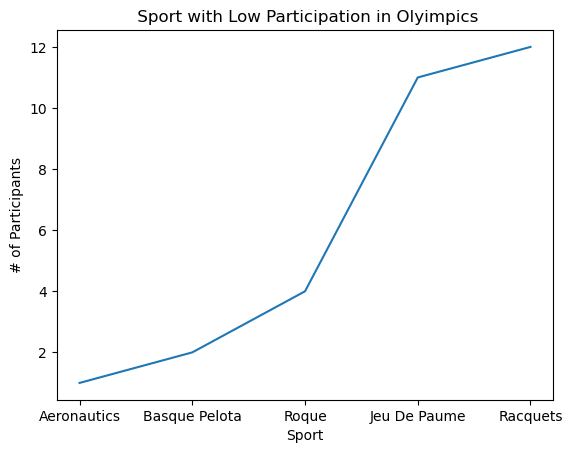

In [18]:
plt.plot(Low_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Low Participation in Olyimpics')
plt.show
plt.savefig("Low_Participation.png")

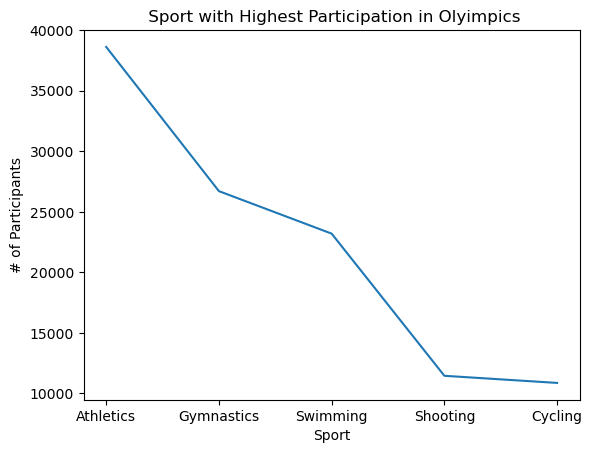

In [19]:
plt.plot(High_sport)
plt.xlabel('Sport')
plt.ylabel('# of Participants')
plt.title(' Sport with Highest Participation in Olyimpics')
plt.show
plt.savefig("High_Participation.png")

In [20]:
#Total sport 
olympics_sport=olympics_age.groupby('Sport')
olympics_sport_count=len(olympics_sport)
olympics_sport_count

66

In [21]:
olympics_sport_year=olympics_age.groupby('Year')
olympics_sport_year_count=len(olympics_sport_year)
olympics_sport_year_count

35

In [22]:
winter_olympic = olympics_age[olympics_age.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
winter_olympic

Number of Sports Played In Winter Olympics: 17


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
4,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
5,5,Christine Jacoba Aaftink,F,21,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands
6,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,No Medal,Netherlands
7,5,Christine Jacoba Aaftink,F,25,185.0,82.0,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,No Medal,Netherlands
8,5,Christine Jacoba Aaftink,F,27,185.0,82.0,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29,179.0,89.0,Poland-1,1976 Winter,1976,Winter,Innsbruck,Luge,No Medal,Poland
271112,135570,Piotr ya,M,27,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,No Medal,Poland
271113,135570,Piotr ya,M,27,176.0,59.0,Poland,2014 Winter,2014,Winter,Sochi,Ski Jumping,No Medal,Poland
271114,135571,Tomasz Ireneusz ya,M,30,185.0,96.0,Poland,1998 Winter,1998,Winter,Nagano,Bobsleigh,No Medal,Poland


In [23]:
Summer_olympic = olympics_age[olympics_age.Season=='Summer']
Summer_sports = len(Summer_olympic[['Sport']].drop_duplicates())
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
Summer_olympic

Number of Sports Played In Summer Olympics: 52


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,No Medal,China
1,2,A Lamusi,M,23,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168.0,NaN,Netherlands,1932 Summer,1932,Summer,Los Angeles,Athletics,No Medal,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27,168.0,76.0,Argentina,2004 Summer,2004,Summer,Athina,Hockey,No Medal,Argentina
271107,135566,"James Francis ""Jim"" Zylker",M,21,175.0,75.0,United States,1972 Summer,1972,Summer,Munich,Football,No Medal,USA
271108,135567,Aleksandr Viktorovich Zyuzin,M,24,183.0,72.0,Russia,2000 Summer,2000,Summer,Sydney,Rowing,No Medal,Russia
271109,135567,Aleksandr Viktorovich Zyuzin,M,28,183.0,72.0,Russia,2004 Summer,2004,Summer,Athina,Rowing,No Medal,Russia


In [24]:
agg_max=olympics_age.groupby('Sport').Age.agg(['max'])
agg_min=olympics_age.groupby('Sport').Age.agg(['min'])
agg_avg=olympics_age.groupby('Sport').Age.agg(['mean'])
agg=olympics_age.groupby('Sport').Age.agg(['mean','max','min'])
agg

,mean,max,min
Sport,,,
Aeronautics,26.000000,26,26
Alpine Skiing,23.000453,55,0
Alpinism,24.840000,57,0
Archery,26.977721,71,0
Art Competitions,39.396870,97,0
...,...,...,...
Tug-Of-War,21.723529,45,0
Volleyball,25.117215,41,0
Water Polo,24.325273,45,0


In [25]:
Top_Sport=['Athletics','Gymnastics','Swimming','Shooting','Cycling']
Bottom_Sport=['Aeronautics','Basque Pelota','Roque','Jeu De Paume','Racquets']
data_top = olympics_age[olympics_age["Sport"].isin(Top_Sport)]
data_Bottom=olympics_age[olympics_age["Sport"].isin(Bottom_Sport)]

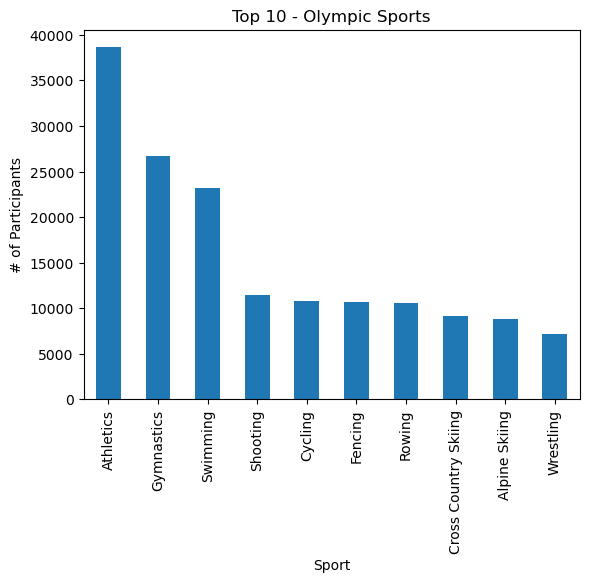

<Figure size 640x480 with 0 Axes>

In [26]:
top_sport=olympics_age['Sport'].value_counts().sort_values(ascending=False)[:1]
bottom_sport=olympics_age['Sport'].value_counts().sort_values(ascending=True)[:1]
olympics_age['Sport'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Top 10 - Olympic Sports')
plt.ylabel('# of Participants')
plt.xlabel('Sport')
plt.show()
plt.savefig("Top_10_Sports.png")

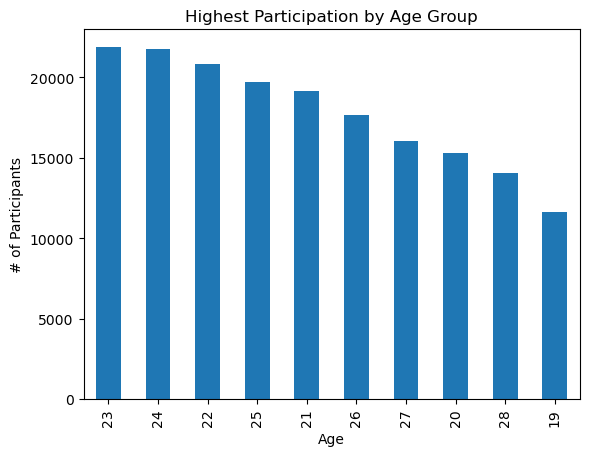

<Figure size 640x480 with 0 Axes>

In [27]:
#olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')

olympics_age['Age'].value_counts().sort_values(ascending=False)[:10].plot(kind='bar' ,title='Highest Participation by Age Group')
plt.ylabel('# of Participants')
plt.xlabel('Age')
plt.show()
plt.savefig("Highest_Participation_by_Age.png")

In [37]:
#Summary 
# replace 0 and NUll age with Mean Age  

mean1_age = olympics_age['Age'].mean()
olympics_age1.loc[olympics_age1['Age'].isna(), 'Age'] = mean1_age
olympics_age1.loc[olympics_age1['Age']==0, 'Age'] = mean1_age
max_age= olympics_age1['Age'].max()
min_age= olympics_age1['Age'].min()
Sport_mean = olympics_age1['Age'].mean()

#Alternate method - Long Running -8 mins runtime - to replace 0 with mean
#olympics_age1.replace(to_replace = 0, value = olympics_age1.mean(), inplace=True)


In [38]:
print(f"------------------------------------------------------------")
print(f"Dataset has data for {olympics_sport_year_count} Years ")
print(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants ")
print(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant")
print(f"Top Sports are {Top_Sport} ")
print(f"Most Uncommon Sports are {Bottom_Sport}")
print(f"The Oldest Participant is of Age {max_age}")
print(f"The Youngest Participant is of Age {min_age}")
print(f"The Average Age of Participants is {Sport_mean}")
print(f'Number of Sports Played In Summer Olympics: {Summer_sports}')
print(f'Number of Sports Played In Winter Olympics: {winter_sports}')
print(f"Total # of Olympic Sport is: {olympics_sport_count}")
    # print(f"Values above {upper_bound} could be {drug} outliers.")
print(f"------------------------------------------------------------")

------------------------------------------------------------
Dataset has data for 35 Years 
The Most Popular sport in the Olympics has 38624 Participants 
The uncommon sport in the Olympics has 1 Participant
Top Sports are ['Athletics', 'Gymnastics', 'Swimming', 'Shooting', 'Cycling'] 
Most Uncommon Sports are ['Aeronautics', 'Basque Pelota', 'Roque', 'Jeu De Paume', 'Racquets']
The Oldest Participant is of Age 97.0
The Youngest Participant is of Age 10.0
The Average Age of Participants is 25.525690452692192
Number of Sports Played In Summer Olympics: 52
Number of Sports Played In Winter Olympics: 17
Total # of Olympic Sport is: 66
------------------------------------------------------------


In [39]:
with open("Analysis_file", "w") as outfile:   
 
    outfile.write("Olympics Data Analayis of Sport and Age after replacing Null age with the Mean Age of participants\n")
    outfile.write(f"------------------------------------------------------------\n")
    outfile.write(f"Dataset analysed has data for {olympics_sport_year_count} Years\n")
    outfile.write(f"The Most Popular sport in the Olympics has {Popular_Sport[0]} Participants\n")
    outfile.write(f"The uncommon sport in the Olympics has {Uncommon_Sport[0]} Participant\n")
    outfile.write(f"Top Sports are {Top_Sport}\n")
    outfile.write(f"Most Uncommon Sports are {Bottom_Sport}\n")
    outfile.write(f"The Oldest Participant is of Age {max_age}\n")
    outfile.write(f"The Youngest Participant is of Age {min_age}\n")
    outfile.write(f"The Average Age of Participants is {Sport_mean}\n")
    outfile.write(f"Number of Sports Played In Summer Olympics: {Summer_sports}\n")
    outfile.write(f"Number of Sports Played In Winter Olympics: {winter_sports}\n")
    outfile.write(f"Total # of Olympic Sport is: {olympics_sport_count}\n")
    outfile.write(f"------------------------------------------------------------\n")

In [40]:
# Chris Start
olympics_data = pd.read_csv('athlete_events.csv')
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [41]:
olympics_data.dropna(subset=['Age', 'Weight'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [42]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [43]:
# Count how many loss incidents occurred in each city
grouped_age = olympics_data.groupby(["Age"])
grouped_age.count()

,ID,Name,Sex,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Age,,,,,,,,,,,,,,
12.0,2,2,2,0,2,2,2,2,2,2,2,2,2,2
13.0,10,10,10,10,10,10,10,10,10,10,10,10,10,10
14.0,53,53,53,53,53,53,53,53,53,53,53,53,53,53
15.0,155,155,155,155,155,155,155,155,155,155,155,155,155,155
16.0,284,284,284,284,284,284,284,284,284,284,284,284,284,284
17.0,400,400,400,399,400,400,400,400,400,400,400,400,400,400
18.0,646,646,646,644,646,646,646,646,646,646,646,646,646,646
19.0,1033,1033,1033,1025,1033,1033,1033,1033,1033,1033,1033,1033,1033,1033
20.0,1562,1562,1562,1550,1562,1562,1562,1562,1562,1562,1562,1562,1562,1562


In [44]:
age_by_medal = grouped_age["Medal"].count()

# Convert the city_counts Series into a DataFrame
fixed_medals = pd.DataFrame(age_by_medal)
fixed_medals.head(55)

,Medal
Age,
12.0,2
13.0,10
14.0,53
15.0,155
16.0,284
17.0,400
18.0,646
19.0,1033
20.0,1562


Text(0.5, 1.0, 'Medal Count By Age')

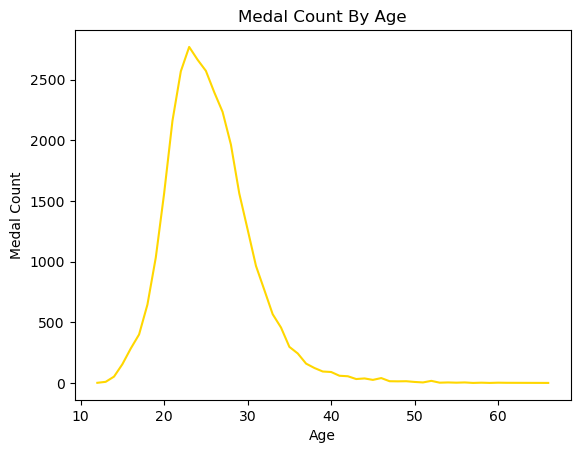

In [45]:
plt.title("Medal Count By Age")
plt.xlabel("Age")
plt.ylabel("Medal Count")
plt.plot(fixed_medals, color='gold')
plt.title("Medal Count By Age")

40        28.0
41        28.0
42        28.0
44        28.0
48        28.0
          ... 
271078    25.0
271080    33.0
271082    28.0
271102    19.0
271103    23.0
Name: Age, Length: 30425, dtype: float64
40        85.0
41        64.0
42        64.0
44        64.0
48        64.0
          ... 
271078    80.0
271080    80.0
271082    82.0
271102    64.0
271103    64.0
Name: Weight, Length: 30425, dtype: float64


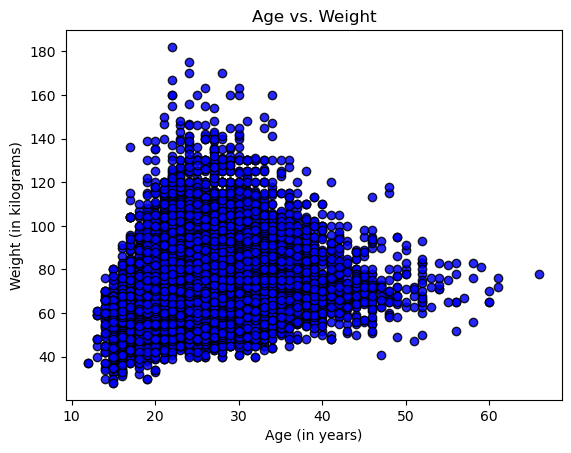

In [46]:
# Build scatter plot for Age vs. Weight

age_scatter = olympics_data['Age']
print(age_scatter)
weight_scatter = olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")


plt.show()

y = 0.49x + 61.4


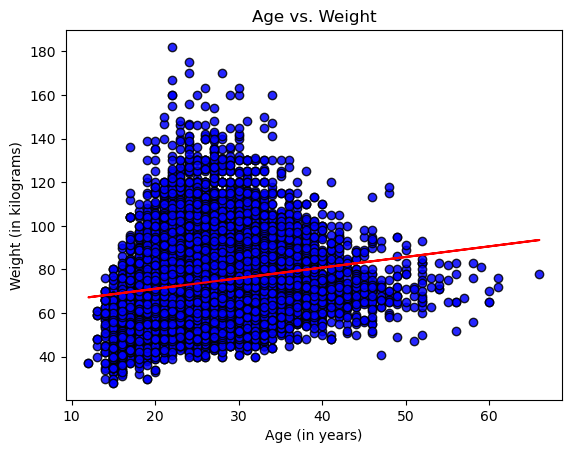

In [47]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(age_scatter, weight_scatter)
regress_values = age_scatter * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(age_scatter,weight_scatter, marker="o", facecolors="blue", edgecolors="black",
             alpha=0.85 )
plt.plot(age_scatter,regress_values,"-r")
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")
plt.show()

In [48]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [49]:
#collect only Gold medals
gold_olympics_data = olympics_data.loc[(olympics_data["Medal"] == "Gold")]
gold_olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold


42        28.0
44        28.0
48        28.0
60        20.0
73        30.0
          ... 
270981    23.0
271009    28.0
271016    29.0
271049    31.0
271076    21.0
Name: Age, Length: 10248, dtype: float64
42        64.0
44        64.0
48        64.0
60        85.0
73        85.0
          ... 
270981    90.0
271009    60.0
271016    93.0
271049    93.0
271076    80.0
Name: Weight, Length: 10248, dtype: float64


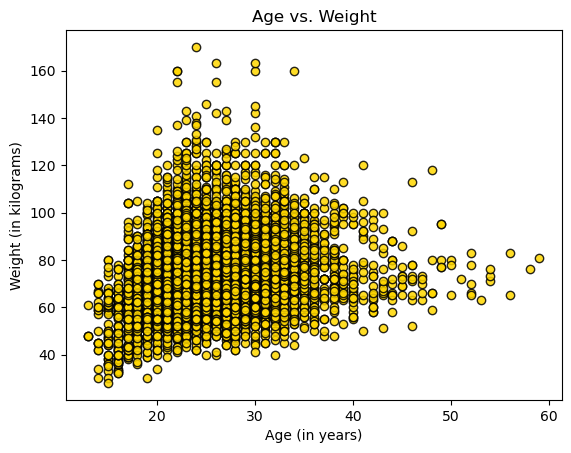

In [50]:
# Build scatter plot for Age vs. Weight

age_scatter = gold_olympics_data['Age']
print(age_scatter)
weight_scatter = gold_olympics_data['Weight']
print(weight_scatter)

plt.scatter(age_scatter, weight_scatter, marker="o", facecolors="gold", edgecolors="black",
             alpha=0.85)

# Incorporate the other graph properties
plt.ylabel('Weight (in kilograms)')
plt.xlabel('Age (in years)')
plt.title("Age vs. Weight")


plt.show()

In [51]:
olympics_data.dropna(subset=['Medal'], inplace=True)
olympics_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [52]:
olympics_data.isnull().sum()

ID          0
Name        0
Sex         0
Age         0
Height    244
Weight      0
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [53]:
#Allison Start
olympic_load = Path("olympic_merged.csv")

# Read School and Student Data File and store into Pandas DataFrames
olympic_merged = pd.read_csv(olympic_load )

In [54]:
olympic_merged_ap=olympic_merged.fillna("NA")
olympic_merged_ap=olympic_merged.loc[olympic_merged["Medal"]!="NA",:]
olympic_merged_ap=olympic_merged.loc[olympic_merged["Age"]!="NA",:]

olympic_merged_m=olympic_merged.loc[olympic_merged["Sex"]!="M",:]
olympic_merged_m_list=olympic_merged_m[["Age","ID"]].copy()
olympic_m_age=olympic_merged_m_list.values.tolist()

In [55]:
olympic_merged_f=olympic_merged.loc[olympic_merged["Sex"]!="F",:]
olympic_merged_f_list=olympic_merged_f[["Age","ID"]].copy()
olympic_f_age=olympic_merged_f_list.values.tolist()

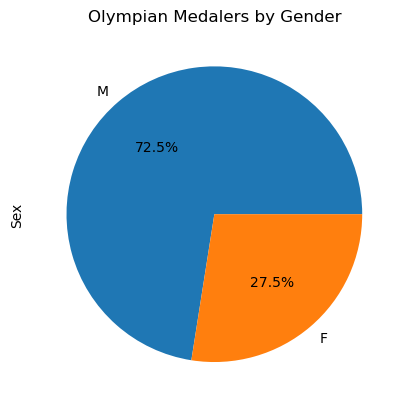

In [56]:
gender_chart=olympic_merged_ap["Sex"].value_counts()
plt.title("Olympian Medalers by Gender")
gender_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

In [57]:
age_bin=[15,24,30,40,80]
labels = ["15-24", "25-30", "31-40", "41-80"]
olympic_merged_ap2=olympic_merged_ap.copy()
olympic_merged_ap2["Age by Decade"]=pd.cut(olympic_merged_ap["Age"],age_bin,labels=labels,include_lowest=True)
olympic_merged_f=olympic_merged_ap2.loc[olympic_merged_ap["Sex"]!="F",:]
olympic_merged_m=olympic_merged_ap2.loc[olympic_merged_ap["Sex"]!="M",:]

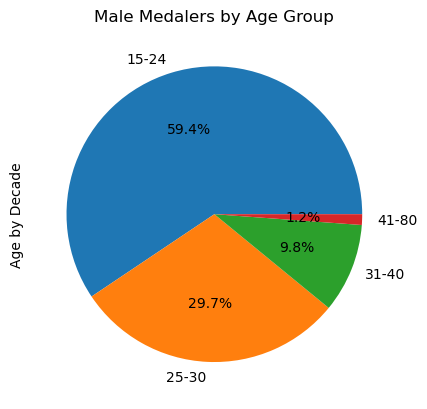

In [58]:
age_m_chart=olympic_merged_m["Age by Decade"].value_counts()
plt.title("Male Medalers by Age Group")
age_m_chart.plot.pie(autopct= "%1.1f%%")
plt.show()

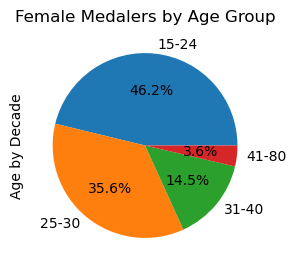

In [59]:
age_f_chart=olympic_merged_f["Age by Decade"].value_counts()
plt.title("Female Medalers by Age Group")
age_f_chart.plot.pie(autopct= "%1.1f%%",figsize=(3,3))
plt.show()

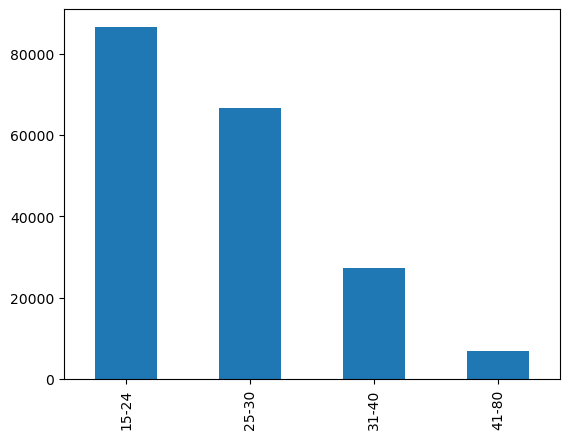

In [60]:
age_f_chart.plot.bar(x="Medal",y="Age")
plt.show()

In [61]:
# Clay Start - drop N/As Medal
olympics_age.dropna(subset=['Medal'],inplace=True)
olympics_age.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,No Medal,Netherlands


In [62]:
# Groupby Region
region=olympics_age.groupby('region').Age.mean().sort_values(ascending=True)
region.head()

region
Marshall Islands    20.285714
Maldives            20.918367
Saint Vincent       21.547619
Laos                21.574074
Yemen               21.604167
Name: Age, dtype: float64

In [63]:
# Check aggregates
agg=olympics_age.groupby('region').Age.agg(['count','max','min','mean'])
agg

,count,max,min,mean
region,,,,
Afghanistan,126,35.0,17.0,23.967172
Albania,70,46.0,16.0,25.342857
Algeria,551,38.0,14.0,24.373835
American Samoa,37,43.0,16.0,27.216216
Andorra,169,61.0,15.0,23.065089
...,...,...,...,...
"Virgin Islands, British",45,62.0,16.0,26.200000
"Virgin Islands, US",294,63.0,14.0,27.309495
Yemen,48,33.0,15.0,21.604167


In [64]:
# Groupby region then medal count
regiongold=olympics_fdf.groupby('region').Medal.count()
regiongold

region
Afghanistan                 2
Albania                     0
Algeria                    17
American Samoa              0
Andorra                     0
                           ..
Virgin Islands, British     0
Virgin Islands, US          1
Yemen                       0
Zambia                      2
Zimbabwe                   22
Name: Medal, Length: 205, dtype: int64

In [65]:
# Create a box and whisker
boxplot = olympics_age.hvplot.box(y='Age', by='Medal', c='gold', height=450, width=450, legend=False)
boxplot

:BoxWhisker   [Medal]   (Age)

In [68]:
yearmax=olympics_age['Year'].min()
yearmax

1896

In [67]:
US = (olympiclocations['region']=='Unites States')
US

NameError: name 'olympiclocations' is not defined

In [69]:
oscar=(olympics_age['Medal']=='Gold') & (olympics_age['Age']==64)
oscargold = olympics_age[oscar]
oscarchuck = oscargold[['Name','Age','Year','Sport','Medal','region']]
oscarchuck

,Name,Age,Year,Sport,Medal,region
105199,Charles Jacobus,64.0,1904,Roque,Gold,USA
233390,Oscar Gomer Swahn,64.0,1912,Shooting,Gold,Sweden


In [70]:
youngest=(olympics_age['Medal']=='Bronze') & (olympics_age['Age']==10)
youngestb = olympics_age[youngest]
Dimitrios = youngestb[['Name','Age','Year','Sport','Medal','region']]
Dimitrios

,Name,Age,Year,Sport,Medal,region
142882,Dimitrios Loundras,10.0,1896,Gymnastics,Bronze,Greece


In [71]:
# Import Lat & Long, Merge with DF
olympicscoordinates = "Lat_Long.csv"
df_loc = pd.read_csv(olympicscoordinates)
olympiclocations = pd.merge(Olympics_df,df_loc, how ="left", on ='region')
olympiclocations.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Lat_Long.csv'

In [72]:
# Drop NA in Age and Medal, check on country
olympiclocations.dropna(subset=['Age','Medal'],inplace=True)
olympics_map1 = olympiclocations[['Age','Medal','region','latitude','longitude']]
nz=olympics_map1[olympics_map1["region"] =='New Zealand']
nz

NameError: name 'olympiclocations' is not defined

In [73]:
# Remove any Zeroes
nozeroes = olympics_map1.loc[(olympics_map1!=0).any(axis=1)]
nozeroes

NameError: name 'olympics_map1' is not defined

In [74]:
# Assign weights to medal type
newolympics_mapdf=olympics_map1.copy()
newolympics_mapdf['sizeMedal']=1
newolympics_mapdf.loc[olympics_map1['Medal']=="Gold","sizeMedal"]=10
newolympics_mapdf.loc[olympics_map1['Medal']=="Silver","sizeMedal"]=6
newolympics_mapdf.loc[olympics_map1['Medal']=="Bronze","sizeMedal"]=3
newolympics_mapdf

NameError: name 'olympics_map1' is not defined

In [75]:
# drop zeroes on medal weight
newolympics_mapdf=newolympics_mapdf.loc[newolympics_mapdf["sizeMedal"]>1]
newolympics_mapdf

NameError: name 'newolympics_mapdf' is not defined

In [76]:
newdf = newolympics_mapdf.copy()
newdf = newdf.replace(r'^\s*$',float('NaN'),regex = True)
newdf

NameError: name 'newolympics_mapdf' is not defined

In [77]:
df2 = newdf.copy()
df2.dropna(inplace =True)
df2

NameError: name 'newdf' is not defined

In [78]:
df3 = newdf.copy()
df3.dropna(subset = ['Age'], inplace = True)
df3

NameError: name 'newdf' is not defined

In [79]:
newolympics_mapdf['Medal']=newolympics_mapdf['Medal'].astype(str)

NameError: name 'newolympics_mapdf' is not defined

In [80]:
newolympics_mapdf.dtypes

NameError: name 'newolympics_mapdf' is not defined

In [81]:
check=olympics_map1.loc[olympics_map1['Age'] <= 0]
olympics_map1.dtypes

NameError: name 'olympics_map1' is not defined

In [82]:
newolympics_mapdf

NameError: name 'newolympics_mapdf' is not defined

In [83]:
import plotly.express as px

In [84]:
fig = px.scatter_mapbox(df3,
                       lat = "latitude",
                       lon = "longitude",
                       color = 'Age',
                       hover_name = 'region',
                       size = 'sizeMedal',
                       height=600,
                       width=1300)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(title_text='Participants by Age')
fig.show()

NameError: name 'df3' is not defined

In [85]:
# Graph Olympic participants
map_plot_1=olympics_map1.hvplot.points(
    'longitude',
    'latitude',
    geo = True,
    color = 'gold',
    tiles = "EsriImagery",
    scale = 0.5)
map_plot_1

NameError: name 'olympics_map1' is not defined

In [86]:
# Find younges bronze age
YoungestBronze=olympics_age.loc[olympics_age['Medal']=='Bronze'].Age.min()
YoungestBronze1=olympics_age.loc[olympics_age['Name']==YoungestBronze]
YoungestBronze1

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region


In [ ]:
#olympics_age.to_csv('olympic_merged.csv')

In [87]:
#Get the Gold Medal count by age
just_gold = olympics_age.loc[olympics_age['Medal'] == "Gold"]
just_gold.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Medal,region
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Gold,Norway
